# James Bonifield

<b>Question 2.1</b>

<i>Describe a situation or problem from your job, 
everyday life, current events, etc., for which a 
classification model would be appropriate. List some (up to 5) predictors that you might use</i>
____________________________________________________________________________________________________________


Currently, I work as a technical consultant for a small software company that chiefly works on software used by telecom companies. In this capacity I am currently working on a way for carriers in our system to validate closeout packages sent by contractors (basically a series of photos and data about a construction site) analytically so that both sides know more quickly if a picture of a job site needs to be retaken or is insufficent. Some of the criteria I am considering to make this judgment are: 
- Percentage of photos rejected in past packages
- Picture resolution
- Distance picture was taken from site coordinates (extracted from photo metadata, can indicate if the picture wasn't taken at site)
- Time picture was taken


<b>Question 2.2</b>

<i>Using the support vector machine function ksvm contained in the R package kernlab, find a 
good classifier for this data. Show the equation of your classifier, and how well it classifies the 
data points in the full data set. (Don’t worry about test/validation data yet; we’ll cover that topic soon.)</i>
____________________________________________________________________________________________________________

In [1]:
data <- read.delim('credit_card_data-headers.txt', header=TRUE)

In [3]:
library(kernlab)
library(ggplot2)

#initialize variables
a <- numeric(0)
lambda <- 0
# Loop through a few values of C, just to get an idea of what works best:
C <- c(0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000)

## Note the added "kpar=list()" is simply added because the message
## "Setting default kernel parameters" was throwing off my formatting... 

for(i in 1:length(C)){    
    # call ksvm.  Vanilladot is a simple linear kernel.
    model <-ksvm(as.matrix(data[,1:10]),as.factor(data[,11]),type='C-svc',kernel= 'vanilladot',C=C[i],
            scaled=TRUE, kpar=list())
    # calculate a1...am
    a <- colSums(model@xmatrix[[1]] * model@coef[[1]])

    # calculate a0
    a0 <- model@b
    i
    # see what the model predicts
    pred <-predict(model,data[,1:10])
    # see what fraction of the model’s predictions match the actual classification
    lambda[i] <- sum(pred == data[,11]) / nrow(data)
    #Grab C = 100000 for printing
    if (C[i] == 100000) {
        coef <- a
        intercept <- a0
    }
}

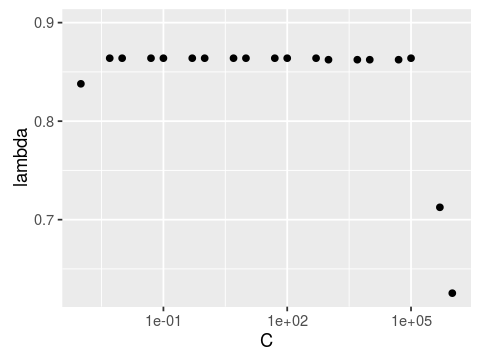

In [115]:
df <- data.frame(C,lambda)
g = ggplot(df, aes(x = C, y=lambda)) + geom_point() + scale_x_continuous(trans='log10') + expand_limits(y=c(0.8,0.9))

print(g)

In [116]:
c(intercept,coef)

A1           A2           A3           A8           A9 
-0.080544514 -0.004117738 -0.086896089  0.129715260 -0.083744032  0.988381368 
         A10          A11          A12          A14          A15 
 0.031253888 -0.055666972 -0.037281856  0.021940744  0.018521785

Plotting the results below on a log scale, we can see that it should be fine picking any value of of C between ~$10^{-2}$ and ~$10^{5}$ should be fine. So, picking C=100000 (see above loop), we get the following values for $A_0$ + the intercepts, which can be expressed as $$$$
$$-0.0805-0.0041x_1-0.0869x_2+0.1297x_3-0.0837x_8+0.9884x_9+0.0313x_{10}-0.0557x_{11}-0.0373x_{12}+0.0219x_{14}+0.0185x_{15} = 0$$

<b>Question 2.3</b>

<i>Using the k-nearest-neighbors classification function kknn contained in the R-kknn package,
suggest a good value of k, and show how well it classifies that data points in the full data set.</i>
____________________________________________________________________________________________________________

In [117]:
library(kknn)
k_values <- seq(1,20,1)
predictions <- c()
count <- 0
max <- nrow(data)
for (i in 1:length(k_values)){
    for (j in 1:max) {
        model_kknn <- kknn(R1~.,data[-j,], data[j,],
                  k=(k_values[i]), scale=TRUE)
        count <- count+round(fitted(model_kknn)+0.5)
        }
  predictions[i] <- count/max
  count <- 0    
}

mapping: y = y 
geom_blank: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

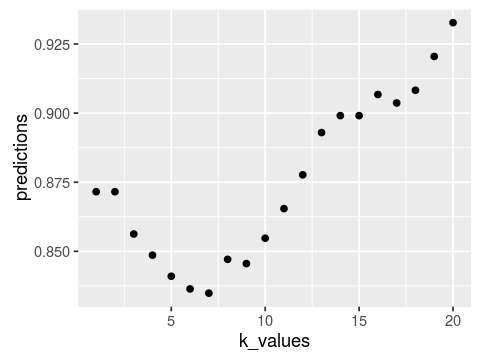

In [118]:
df2 <- data.frame(k_values,predictions)
g2 = ggplot(df2, aes(x = k_values, y=predictions)) + geom_point() 
     expand_limits(y=c(0.8,1))

print(g2)

As we can see, on the whole as $K$ dips down and then quickly increases converges to 1 as expected. Without true validation, it is difficult to say what the best $K$ value is, but it is almost certainly not >20

In [119]:
library(nbconvert)

ERROR: Error in library(nbconvert): there is no package called 'nbconvert'
